# 뉴스 그룹 분류 경진대회

In [1]:
import pandas as pd

df = pd.read_csv('./Text_Dataset.csv', skiprows=11, encoding='euc-kr')
df

,id,text,target
0,0,돈 넣어 둘 곳이 필요해요,4
1,1,돈 좀 어디 넣어두고 싶어서요,4
2,2,계좌 하나만 파주시게,4
3,3,통장을 하나 만들고 싶다,4
4,4,저기 그거 뭐야 통장 하나 만들어 줘,4
...,...,...,...
1887,1887,송금은 어떻게 하는 것입니까?,1
1888,1888,돈 보내고 싶어,1
1889,1889,김국민에게 돈 50만원 송금해줘,1
1890,1890,김국민에게 80만원 송금해줘,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1892 non-null   int64 
 1   text    1892 non-null   object
 2   target  1892 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 44.5+ KB


In [3]:
df.isna().sum()

id        0
text      0
target    0
dtype: int64

In [4]:
df.shape

(1892, 3)

In [5]:
sorted(df['target'].unique())

[0, 1, 2, 3, 4, 5, 6]

In [6]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 존재하지 않습니다


In [7]:
# import re 

# def clean_text(texts): 
#   corpus = [] 
#   for i in range(0, len(texts)): 
#     review = re.sub(r'\s+', ' ', texts[i]) #extra space 제거
#     review = re.sub(r'\s+', ' ', review) #spaces 제거
#     review = re.sub(r"^\s+", '', review) #space from start 제거
#     review = re.sub(r'\s+$', '', review) #space from the end 제거
#     review = re.sub(r'_', ' ', review) #space from the end 제거
#     corpus.append(review) 
  
#   return corpus

# #     review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
# #     review = re.sub(r'\d+','', review)#숫자 제거
# #     review = review.lower() #소문자 변환
# #     review = re.sub(r'<[^>]+>','',review) #Html tags 제거

In [9]:
# temp = clean_text(df['text']) #메소드 적용
# df['text'] = temp
# df.head()

# EDA

### 말뭉치 전처리

In [10]:
val_count = df['target'].value_counts() # 유니크값의 개수를 확인합니다.

for i in range(0,7):
  print(f'라벨 {i}인 리뷰 개수:', val_count[i])

라벨 0인 리뷰 개수: 201
라벨 1인 리뷰 개수: 237
라벨 2인 리뷰 개수: 234
라벨 3인 리뷰 개수: 359
라벨 4인 리뷰 개수: 425
라벨 5인 리뷰 개수: 287
라벨 6인 리뷰 개수: 149


#### plot 함수를 이용해 label 개수를 그래프로 그려 시각적으로 비교

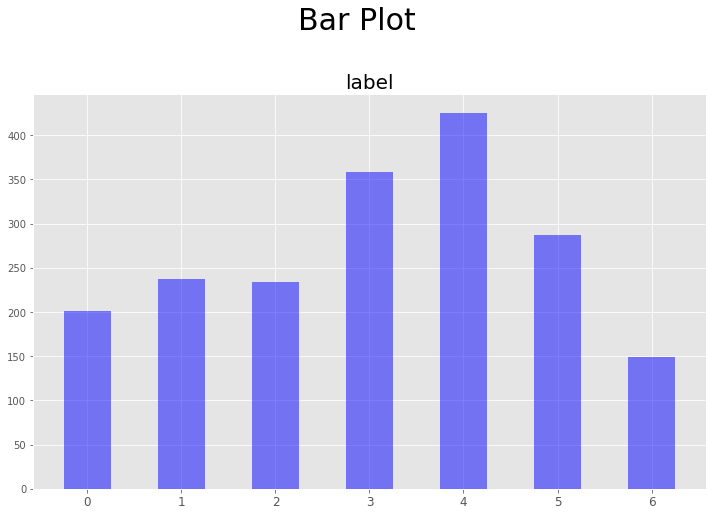

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

%matplotlib inline
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = df['target']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

6번 라벨이 다소 적고 3, 4번 라벨이 많음

# text 길이 확인

In [12]:
str_len_mean = np.mean(df['text'].str.len())
print('말뭉치의 평균 길이 :',round(str_len_mean,0))

말뭉치의 평균 길이 : 9.0


In [13]:
# 데이터 필터링을 위한 마스크 설정
for i in range(0, 20):
  globals()['mask_{}'.format(i)] = (df.target == i)

# 전체 및 그룹 집합을 설정합니다.
df_train = df.text.copy() # 전체 train 데이터

for i in range(0, 7):
  globals()['df_{}'.format(i)] = df.loc[globals()['mask_{}'.format(i)],:].text # 20가지 라벨 각각에 해당하는 데이터를 df0~19로 할당

# 스무가지로 나뉜 집합을 리스트로 묶어줍니다.
compare = [df_0, df_1, df_2, df_3, df_4, df_5, 
           df_6 ]

# 불용어 

In [14]:
text = '아 왔어요 왔다 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'
stopwords_k = text.split(' ')
stopwords_k


['아',
 '왔어요',
 '왔다',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를',
 '들면',
 '예를',
 '들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수',
 '없다',
 '해서는',
 '안된다',
 '뿐만',
 '아니라',
 '만이',
 '아니다',
 '만은',
 '아니다',
 '막론하고',
 '관계없이',
 '그치지',
 '않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지',
 '않다',
 '따지지',
 '않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만',
 '못하다',
 '하는',
 '편이',
 '낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이',
 '외에',
 '이',
 '밖에',
 '하여야',
 '비로소',
 '한다면',
 '몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할',
 '생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게',
 '함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에',
 '틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 

#### Word Cloud & 시각화

In [15]:
df_3

1046     통장 확인 좀
1047          잔고
1048          잔액
1049        카드내역
1050         입출금
          ...   
1400          조회
1401          조회
1402          조회
1403          조회
1853    통장에 얼마있어
Name: text, Length: 359, dtype: object

In [16]:
# !pip install wordcloud-1.8.1-cp39-cp39-win_amd64.whl

In [17]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import pickle
from nltk.corpus import stopwords
from os import path

In [18]:
# 하나의 문자열
def df2str(df):
    
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

워드클라우드를 만들기 위하여 텍스트를 토큰화 하겠습니다. nltk의 word_tokenize 메소드를 이용하여 토큰화

In [19]:
word_tokens = nltk.word_tokenize(df2str(df_6))

### 품사 분리 POS tagging
데이터 분석에 가장 큰 의미를 갖는 형태소인 명사만을 추출하기 위하여
토큰화된 단어의 품사를 분리해보도록 하겠습니다.
nltk의 pos_tag 메소드를 이용하여 품사분리를 진행합니다.

In [20]:
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
tokens_pos = nltk.pos_tag(word_tokens)

### 명사만 추출하기
명사는 NN을 포함하고 있으므로 NN이 들어있는 단어만을 추출해보도록 하겠습니다.

In [21]:
# 명사는 NN을 포함하고 있음을 알 수 있음
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)

## 품사 원형 찾기

워드클라우드 단어의 빈도수를 정확히 축정하기 위하여 단어의 원형형태로 통일해보도록 하겠습니다.

nltk에서 제공하는 WordNetLemmatizer() 메소드를 이용해 보겠습니다.

In [22]:
# 명사의 경우 보통 복수 -> 단수 형태로 변형
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

## 불용어 처리

nltk에서 제공하는 불용어 기본 사전 이용하여 워드클라우드에 사용하지 않을 단어를 제거해 봅시다. 

In [23]:
stopwords_list = stopwords_k #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

## 빈도분석

In [24]:
from collections import Counter
c = Counter(final_NN_words)
k = 10

In [25]:
c.most_common(k) # 빈도수 기준 상위 k개 단어 출력

[('뽑으러', 32),
 ('인출하러', 31),
 ('왔습니다.현금', 30),
 ('필요해서', 20),
 ('왔습니다.현금주세요현금', 18),
 ('인출현금', 12),
 ('왔어현금이', 9),
 ('왔습니다.출금이', 8),
 ('왔습니다.현금이', 8),
 ('달라', 8)]

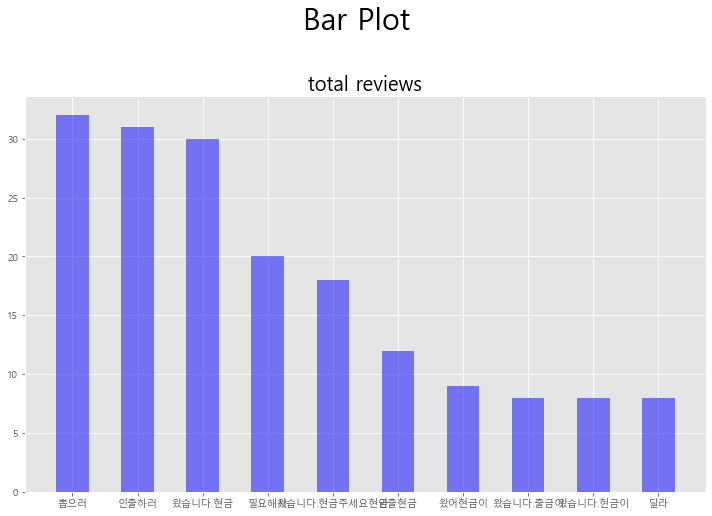

In [26]:
# 한글 세팅 방법
plt.rcParams['font.family'] = "Malgun Gothic"  # 맑은 고딕
# 한글이 잘 안먹으면 kernel restart

top_10 = c.most_common(k) # 추출한 명사 중 상위 10개
keys = [top_10[i][0] for i in range(len(top_10))]
values = [top_10[i][1] for i in range(len(top_10))]

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('total reviews', fontsize=20)
plt.bar(keys, values, width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 워드클라우드

In [27]:
# # 한글 세팅 방법

# # 한글이 잘 안먹으면 kernel restart

# noun_text = ''
# for word in final_NN_words:
#     noun_text = noun_text +' '+word

# wordcloud = WordCloud(max_font_size=50, #가장 큰 폰트 크기 제한
#                       width=500, #너비
#                       height=300, #높이
#                       font_path='font/Malgun Gothic.ttf',
#                       background_color='white', #배경 색상
#                       relative_scaling=.2 #상대적인 크기
#                       ).generate(noun_text)
# # plt.rcParams['font.family'] = "Malgun Gothic"  # 맑은 고딕

# # wc = WordCloud(font_path='./font/BMDOHYEON_ttf.ttf', background_color="white", max_words=20000, mask=mask,max_font_size=300)
# # wordcloud = WordCloud(, background_color='white', colormap='winter').generate(text)

# plt.figure(figsize=(20,10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

# 분류 학습 및 예측

In [28]:
X = df['text'].values
y = df['target'].values

In [29]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) # Effectively removes HTML markup tags
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    return text

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords_k, ngram_range=(1,2),)
# min_df=2, preprocessor=preprocessor, ngram_range=(1,2),
vectorizer.fit(X) 
X = vectorizer.transform(X) 

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [32]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=500)

In [33]:
model.fit(X_train, Y_train)

MLPClassifier(max_iter=500)

In [34]:
from sklearn.metrics import accuracy_score

model.score(X_train, Y_train), model.score(X_test, Y_test)

(1.0, 0.9656992084432717)

In [35]:
ex_df = { 'text':['현금 인출 하러 왔습니다.', '돈 뽑으러 왔어요', '돈을 달라','계좌를 개설하러 왔습니다.','입금 하려구요','배고파요','커피 주세요','통장에 얼마있어']}
ex_df = pd.DataFrame(ex_df)
ex_df

,text
0,현금 인출 하러 왔습니다.
1,돈 뽑으러 왔어요
2,돈을 달라
3,계좌를 개설하러 왔습니다.
4,입금 하려구요
5,배고파요
6,커피 주세요
7,통장에 얼마있어


In [36]:
ex = vectorizer.transform(ex_df.text)
y_pred = model.predict(ex)
y_pred

array([6, 6, 6, 4, 2, 0, 0, 3], dtype=int64)

0,오류,손현오

1,송금,권병지

2,입금,김민석

3,조회,성용제

4,계좌 개설,황지원

5,카드 발급,이찬형

6,출금,손현오

7,기타,손현오
,,

In [37]:
saved_model = pickle.dumps(model)

In [38]:
import joblib
joblib.dump(model, 'corpus.pkl') 

['corpus.pkl']